AR(P)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

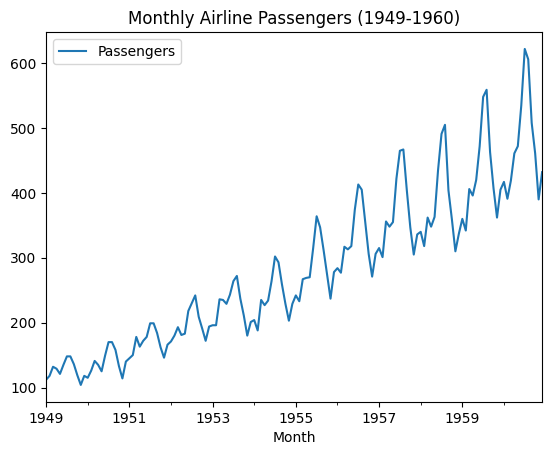

In [2]:
# Load the Airline Passengers dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url, parse_dates=['Month'], index_col='Month')
df_plot = df.plot(title='Monthly Airline Passengers (1949-1960)')

In [3]:
# Fit AR(1) model
model = AutoReg(df, lags=12)
result = model.fit()
print(result.summary())

                            AutoReg Model Results                             
Dep. Variable:             Passengers   No. Observations:                  144
Model:                    AutoReg(12)   Log Likelihood                -530.959
Method:               Conditional MLE   S.D. of innovations             13.511
Date:                Tue, 31 Oct 2023   AIC                           1089.918
Time:                        02:39:07   BIC                           1130.277
Sample:                    01-01-1950   HQIC                          1106.318
                         - 12-01-1960                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              9.4369      3.450      2.735      0.006       2.675      16.198
Passengers.L1      0.4437      0.074      6.017      0.000       0.299       0.588
Passengers.L2     -0.2716      0.082

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


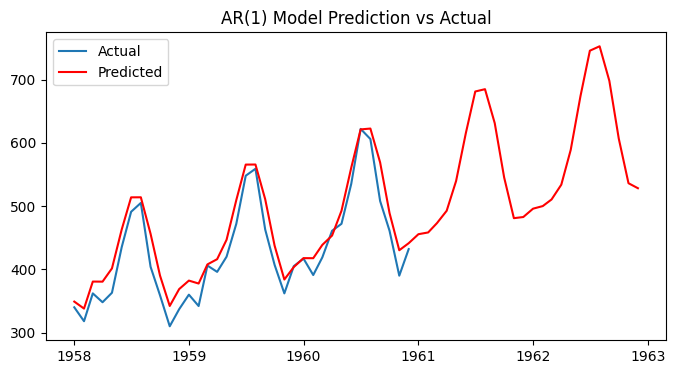

In [6]:
# Predict using the AR model
start_date = '1958-01-01'
end_date = '1962-12-01'
predicted_values = result.predict(start=start_date, end=end_date, dynamic=True)
plt.figure(figsize=(8, 4))
plt.plot(df[start_date:end_date], label="Actual")
plt.plot(predicted_values, label="Predicted", color='red')
plt.legend()
plt.title('AR(1) Model Prediction vs Actual')
plt.show()

MA(q)

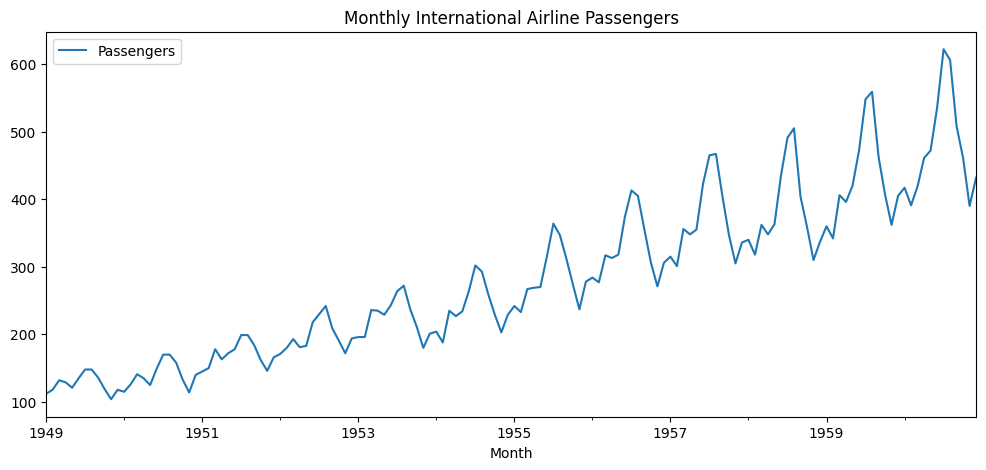

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf

# Load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url, parse_dates=['Month'], index_col='Month')
df.plot(figsize=(12, 5))
plt.title('Monthly International Airline Passengers')
plt.show()

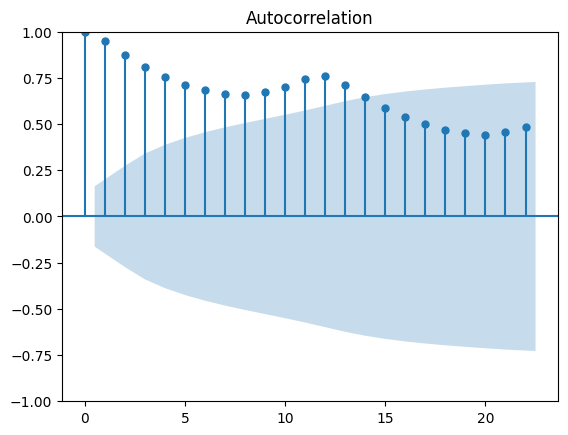

In [8]:
plot_acf(df)
plt.show()

In [10]:
# Fit an MA(5) model
model = ARIMA(df, order=(0, 0, 5))
result = model.fit()

# Print model summary
print(result.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(0, 0, 5)   Log Likelihood                -733.783
Date:                Tue, 31 Oct 2023   AIC                           1481.565
Time:                        02:40:06   BIC                           1502.354
Sample:                    01-01-1949   HQIC                          1490.013
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        280.3150     16.333     17.163      0.000     248.303     312.327
ma.L1          1.1215     79.140      0.014      0.989    -153.990     156.233
ma.L2          0.3924      9.686      0.041      0.9

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


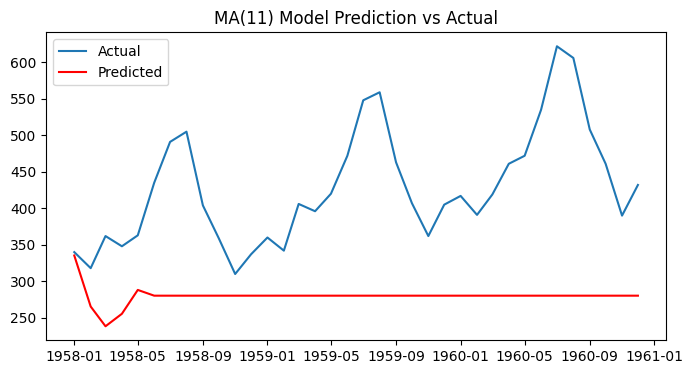

In [11]:
# Predict using the AR model
start_date = '1958-01-01'
end_date = '1960-12-01'
predicted_values = result.predict(start=start_date, end=end_date, dynamic=True)
plt.figure(figsize=(8, 4))
plt.plot(df[start_date:end_date], label="Actual")
plt.plot(predicted_values, label="Predicted", color='red')
plt.legend()
plt.title('MA(11) Model Prediction vs Actual')
plt.show()

# Armed robberies in Boston (January 1966 to October 1975)

<ipython-input-12-99dc13a46042>:6: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  robberies = pd.read_csv(url, header=0, index_col=0, parse_dates=True, squeeze=True)


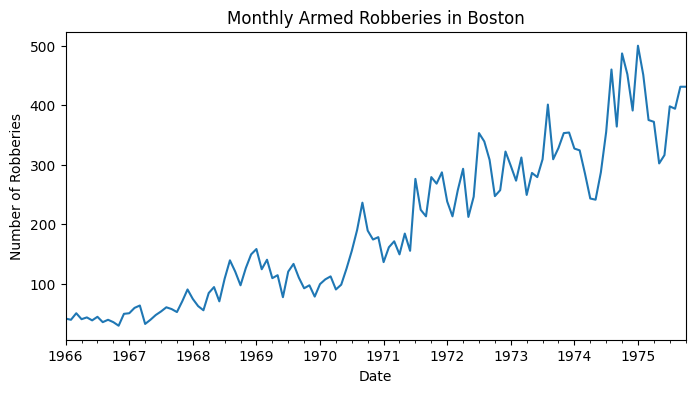

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-robberies.csv"
robberies = pd.read_csv(url, header=0, index_col=0, parse_dates=True, squeeze=True)

# Plot
plt.figure(figsize=(8,4))
robberies.plot(title="Monthly Armed Robberies in Boston")
plt.xlabel("Date")
plt.ylabel("Number of Robberies")
plt.show()

In [13]:
robberies.head(30)

Month
1966-01-01    41
1966-02-01    39
1966-03-01    50
1966-04-01    40
1966-05-01    43
1966-06-01    38
1966-07-01    44
1966-08-01    35
1966-09-01    39
1966-10-01    35
1966-11-01    29
1966-12-01    49
1967-01-01    50
1967-02-01    59
1967-03-01    63
1967-04-01    32
1967-05-01    39
1967-06-01    47
1967-07-01    53
1967-08-01    60
1967-09-01    57
1967-10-01    52
1967-11-01    70
1967-12-01    90
1968-01-01    74
1968-02-01    62
1968-03-01    55
1968-04-01    84
1968-05-01    94
1968-06-01    70
Name: Robberies, dtype: int64

In [14]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(robberies)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: 1.001102140245781
p-value: 0.994277563805723


<Figure size 640x480 with 0 Axes>

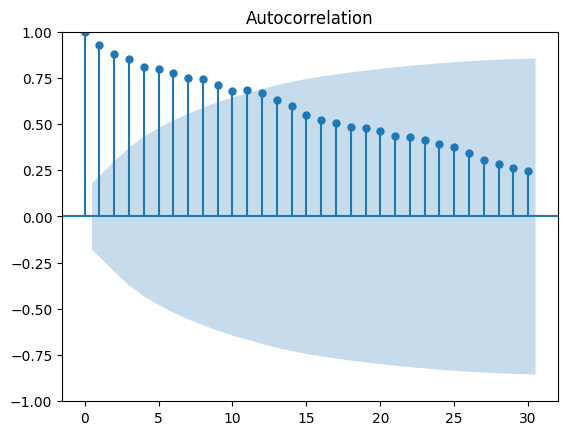

<Figure size 640x480 with 0 Axes>

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(robberies, lags=30, ax=plt.gca())
plt.figure()

In [16]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(robberies, order=(0,0,13))
model_fit = model.fit()
print(model_fit.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals

                               SARIMAX Results                                
Dep. Variable:              Robberies   No. Observations:                  118
Model:                ARIMA(0, 0, 13)   Log Likelihood                -606.284
Date:                Tue, 31 Oct 2023   AIC                           1242.567
Time:                        02:40:33   BIC                           1284.128
Sample:                    01-01-1966   HQIC                          1259.442
                         - 10-01-1975                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        196.3349     39.529      4.967      0.000     118.860     273.809
ma.L1          0.7951      0.521      1.527      0.127      -0.225       1.815
ma.L2          0.8146      0.129      6.332      0.0

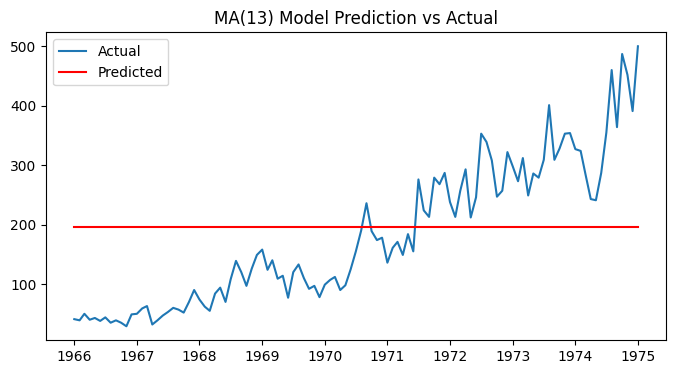

In [17]:
# Predict using the AR model
start_date = '1966-01-01'
end_date = '1975-01-01'
predicted_values = model_fit.predict(start=start_date, end=end_date, dynamic=True)
plt.figure(figsize=(8, 4))
plt.plot(robberies[start_date:end_date], label="Actual")
plt.plot(predicted_values, label="Predicted", color='red')
plt.legend()
plt.title('MA(13) Model Prediction vs Actual')
plt.show()

In [18]:
from statsmodels.tsa.ar_model import AutoReg

# Fit AR(1) model
model = AutoReg(robberies, lags=24)
result = model.fit()
print(result.summary())

                            AutoReg Model Results                             
Dep. Variable:              Robberies   No. Observations:                  118
Model:                    AutoReg(24)   Log Likelihood                -460.851
Method:               Conditional MLE   S.D. of innovations             32.581
Date:                Tue, 31 Oct 2023   AIC                            973.701
Time:                        02:40:41   BIC                           1039.827
Sample:                    01-01-1968   HQIC                          1000.411
                         - 10-01-1975                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            16.2854      8.238      1.977      0.048       0.139      32.432
Robberies.L1      0.5251      0.104      5.040      0.000       0.321       0.729
Robberies.L2      0.0880      0.117     

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


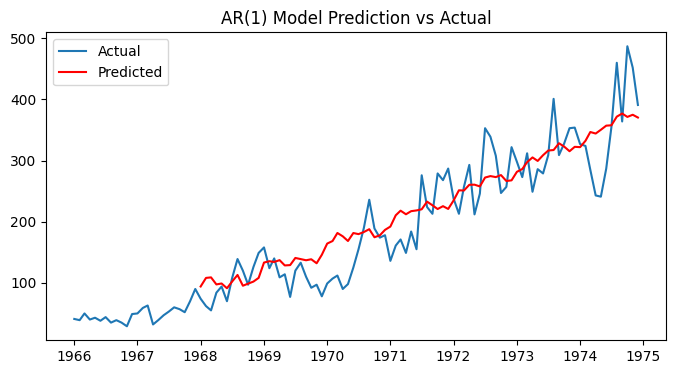

In [19]:
# Predict using the AR model
start_date = '1966-01-01'
end_date = '1974-12-01'
predicted_values = result.predict(start=start_date, end=end_date, dynamic=True)
plt.figure(figsize=(8, 4))
plt.plot(robberies[start_date:end_date], label="Actual")
plt.plot(predicted_values, label="Predicted", color='red')
plt.legend()
plt.title('AR(1) Model Prediction vs Actual')
plt.show()